In [2]:
%config IPCompleter.greedy=True
# Common imports
import numpy as np
import os
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

   Get the date

In [3]:
peptide = pd.read_csv("Visual_Peptides.csv", sep='\\t')
peptide.head()


C:\Users\vishn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,"""peptide",label_chr,label_num,"data_type"""
0,"""LLTDAQRIV",SB,1,"train"""
1,"""LMAFYLYEV",SB,2,"train"""
2,"""VMSPITLPT",SB,1,"test"""
3,"""SLHLTNCFV",WB,1,"train"""
4,"""RQFTCMIAV",WB,1,"train"""


In [4]:
peptide_peptide = peptide['"peptide']
peptide_peptide.head()

0    "LLTDAQRIV
1    "LMAFYLYEV
2    "VMSPITLPT
3    "SLHLTNCFV
4    "RQFTCMIAV
Name: "peptide, dtype: object

In [5]:
peptide_label = peptide["label_chr"]
print(peptide.groupby(['label_num']).count())



           "peptide  label_chr  data_type"
label_num                                 
0              7920       7920        7920
1              7920       7920        7920
2              7920       7920        7920


([array([0., 3., 0.]), array([0., 3., 0.]), array([0., 3., 0.])],
 array([7919.5       , 7919.83333333, 7920.16666667, 7920.5       ]),
 <a list of 3 Lists of Patches objects>)

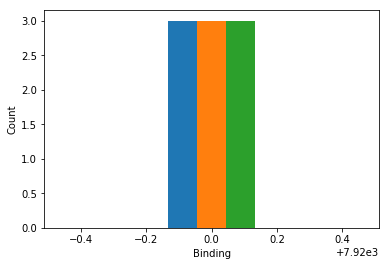

In [6]:
plt.xlabel("Binding")
plt.ylabel("Count")
plt.hist(peptide.groupby(['label_num']).count(),bins=3)

Text(0.5, 0.98, 'Categorical Plotting')

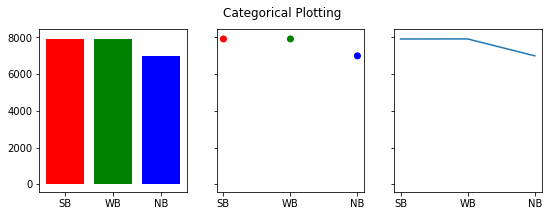

In [7]:
data = {'SB': 7920, 'WB': 7921, 'NB': 7000}
names = list(data.keys())
values = list(data.values())
colors = ['red','green','blue']

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values, color=colors)
axs[1].scatter(names, values,color=colors)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')


In [8]:
import logomaker 


Running C:\Users\vishn\Anaconda3\lib\site-packages\logomaker/examples/demo_fig1b.py:
-------------------------------------------------------------
# do imports
import matplotlib.pyplot as plt
import logomaker as logomaker

# load crp energy matrix
crp_df = -logomaker.get_example_matrix('crp_energy_matrix',
                                        print_description=False)

# create Logo object
crp_logo = logomaker.Logo(crp_df,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)

# style and show figure
crp_logo.fig.show()
---------------

C:\Users\vishn\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\vishn\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


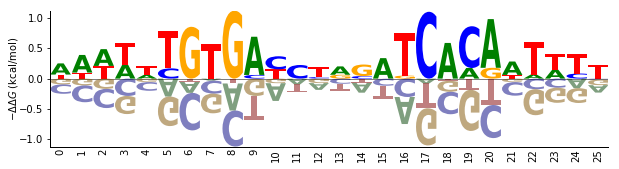

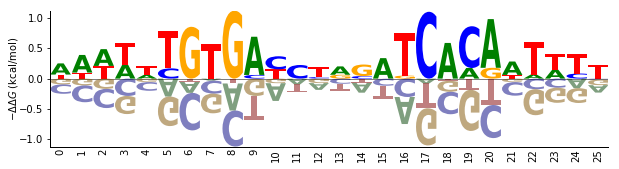

In [9]:
logomaker.demo('fig1b')

In [10]:
logomaker.Logo(peptide)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
logomaker.list_example_datafiles()

In [12]:
logomaker.open_example_datafile('ars_wt_sequence.txt')

Description of example matrix "ars_wt_sequence.txt":
# 
# ARS1 (a.k.a. ARS416) wild-type sequence.
# On S. cerevisiae S288C chromosome IV
# Sequence ID: NC_001136.10
# position: [462475:462624] (150 bp)
# strand: minus
# 



<_io.TextIOWrapper name='C:\\Users\\vishn\\Anaconda3\\lib\\site-packages\\logomaker\\src/../examples/datafiles/ars_wt_sequence.txt' mode='r' encoding='cp1252'>

In [15]:
logomaker.Logo(peptide["peptide"])

KeyError: 'peptide'

In [16]:
fig1b.head()

NameError: name 'fig1b' is not defined

In [53]:
peptide_only = pd.read_csv("Visual_Peptides - Copy.csv")

#Convert to series
Peptideseries=peptide_only.iloc[0:100,0]
type(Peptideseries)

PeptideseriesConCatenate=Peptideseries.str.cat(sep='').replace('\t','')
PeptideseriesConCatenate

counts_mat = logomaker.alignment_to_matrix(Peptideseries)
counts_mat.head()

,,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
pos,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.0,1.0,2.0,2.0,10.0,6.0,5.0,5.0,6.0,...,8.0,5.0,2.0,6.0,3.0,9.0,3.0,7.0,9.0,3.0
1,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0,18.0,2.0,...,20.0,2.0,2.0,3.0,3.0,1.0,1.0,7.0,0.0,2.0
2,0.0,9.0,2.0,7.0,4.0,5.0,2.0,5.0,5.0,2.0,...,8.0,7.0,6.0,2.0,4.0,2.0,4.0,4.0,8.0,6.0
3,0.0,8.0,2.0,10.0,8.0,3.0,5.0,5.0,2.0,2.0,...,3.0,6.0,11.0,6.0,3.0,3.0,7.0,1.0,3.0,2.0
4,0.0,8.0,3.0,4.0,6.0,7.0,8.0,2.0,5.0,2.0,...,3.0,3.0,4.0,4.0,4.0,3.0,6.0,8.0,6.0,12.0


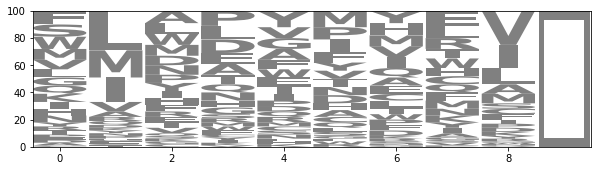

In [55]:
logomaker.Logo(counts_mat)

C:\Users\vishn\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


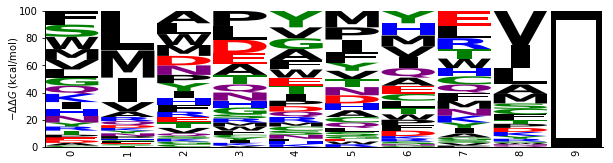

In [57]:
crp_logo = logomaker.Logo(counts_mat,
                          color_scheme='chemistry',
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)

# style and show figure
crp_logo.fig.show()

In [46]:
peptide_only = pd.read_csv("Visual_Peptides - Copy.csv")
peptide_only.head()

#Convert to series
Peptideseries=peptide_only.iloc[0:5,0]
type(Peptideseries)

PeptideseriesConCatenate=Peptideseries.str.cat(sep='').replace('\t','')
PeptideseriesConCatenate

#logomaker.sequence_to_matrix(peptide_only.to_string(), None, 'protein',False,'probability')
test=logomaker.sequence_to_matrix(PeptideseriesConCatenate, None, 'protein',False,'information',True)
test

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
pos,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,4.321928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,4.321928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,4.321928,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.0,0.000000,4.321928,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.321928
5,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,4.321928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.321928
7,0.000000,0.000000,0.0,4.321928,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.321928,0.0,0.000000


In [39]:
#test1 = logomaker.transform_matrix(test, True, True,  weight, counts,None, 1 )

NameError: name 'weight' is not defined

In [47]:
import seqlogo
ppm = seqlogo.Ppm(test)
seqlogo.seqlogo(ppm, ic_scale = True, format = 'svg', size = 'medium')

(45, 20)


ValueError: None alphabet selected, but PM is not 4 rows long

C:\Users\vishn\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


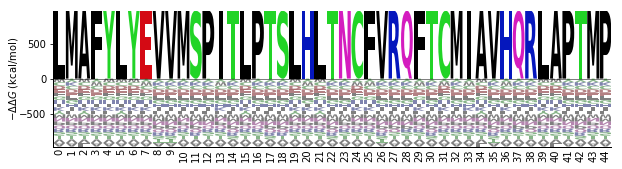

In [31]:
#logomaker.Logo(test)

crp_logo = logomaker.Logo(test1,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)

# style and show figure
crp_logo.fig.show()